In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import dataset in python

house = pd.read_excel(r'C:\Users\ashok\Downloads\PG\PGP Data Science\Data_Science_With_Python_2020\Projects\house.xlsx')

In [4]:
#first few lines
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
#exploration of data
house.size

206400

In [7]:
house.shape

(20640, 10)

In [8]:
#get column names

house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [10]:
# structure of the dataframe
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [11]:
#find missing value
house['total_bedrooms'].isnull().sum()

207

In [12]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [13]:
# descriptive statistic
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D10EE2B8E0>,
      dtype=object)

<Figure size 576x576 with 0 Axes>

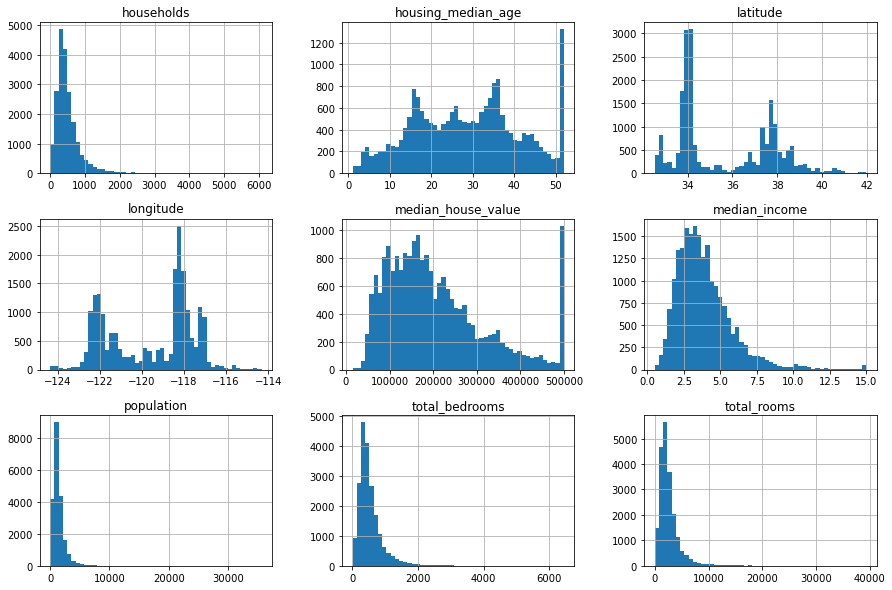

In [16]:
# histogram for all numeric variables

plt.figure(figsize=(8,8))

house.hist(bins=50, figsize=(15,10))

In [17]:
house['total_bedrooms'].mean()

537.8705525375618

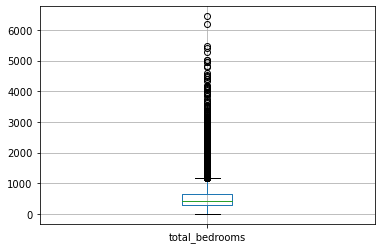

In [19]:
house.boxplot(column='total_bedrooms')

In [20]:
# handle missing values

#mean to fill the missing values

house['total_bedrooms']=np.where(house['total_bedrooms'].isnull(),house['total_bedrooms'].mean(),house['total_bedrooms'])

In [21]:
#check missing values
house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [22]:
# avg=house['total_bedrooms'].mean()
# house['total_bedrooms'].fillna(avg, inplace=True)

#np.where(condition, if true then, if false then)



In [24]:
#convert categorical data into numerical data

#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#house['area_label']=le.fit_transform(house['ocean_proximity'])

#use pd.get_dummies to convert the categorical values into the dummy variables

ocean_dummy=pd.get_dummies(house['ocean_proximity'])
ocean_dummy

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [25]:
# merge data by rows
house_1=pd.concat([house,ocean_dummy], axis=1)

In [26]:
house_1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,0,0,0,1,0


In [30]:
# remove ocean_proximity
house_1.drop('ocean_proximity', axis=1, inplace=True)

In [31]:
house_1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [32]:
# split data into training and test data

from sklearn.model_selection import train_test_split

In [ ]:
# X = list of independent variables in the form of a df
# y= dependent vatiable in the form of a series


In [33]:
# from house_1 remove median_house_value

X=house_1.drop('median_house_value', axis=1)
type(X)

pandas.core.frame.DataFrame

In [34]:
y=house_1['median_house_value']
y[:5]

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [35]:
type(y)

pandas.core.series.Series

In [36]:
# training dataset to fit the model function
# train size=0.8, test size=0.2
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=100)

In [37]:
Xtrain.shape

(16512, 13)

In [39]:
Xtest.shape

(4128, 13)

In [40]:
ytrain.shape

(16512,)

In [41]:
#standardization of data

from sklearn.preprocessing import StandardScaler

In [42]:
sc=StandardScaler()

In [43]:
Xtrain=sc.fit_transform(Xtrain)

In [45]:
# check standardize

Xtrain.mean(axis=0)

array([-8.29708825e-16,  3.25014563e-15,  6.23962553e-17,  2.28069071e-17,
        9.63914564e-17, -7.91786963e-17, -4.28167407e-17, -1.76592160e-16,
        1.04997836e-16, -3.35648821e-17, -2.58191401e-18,  1.03276560e-17,
        2.60342996e-17])

In [46]:
Xtrain.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [47]:
# transform test data
Xtest=sc.transform(Xtest)

In [48]:
#perform linear regression on training data

from sklearn import linear_model

In [49]:
# create an instance of LinearRegression()

lin_model=linear_model.LinearRegression(fit_intercept=True, n_jobs=1)

In [50]:
lin_model

LinearRegression(n_jobs=1)

In [51]:
# we will fit the training data on the model

lin_model.fit(Xtrain,ytrain)

LinearRegression(n_jobs=1)

In [52]:
# now model has been trained on training data

# for getting the values of coefficient and intercept

lin_model.intercept_

207141.48977201237

In [53]:
lin_model.coef_

array([-5.33389237e+04, -5.40436854e+04,  1.31483794e+04, -1.01060310e+04,
        3.06962652e+04, -4.29737826e+04,  2.69125325e+04,  7.31409260e+04,
        1.45635633e+17,  1.36310780e+17,  4.56610491e+15,  9.28062684e+16,
        9.93231093e+16])

In [54]:
#predict output for the dataset using the fitted model
#fitted_model_name.predict(test data)

ypred=lin_model.predict(Xtest)
ypred

array([222557.48977201, 157837.48977201, 182829.48977201, ...,
       308813.48977201, 106621.48977201, 173133.48977201])

In [55]:
# find root mean square error

from sklearn.metrics import mean_squared_error

In [60]:
# mean_squared_error(actual, test)

mse=mean_squared_error(ytest,ypred)

In [61]:
import math

In [63]:
rmse=math.sqrt(mse)
rmse

67150.72410002595

In [64]:
# to check rsq on the test data

lin_model.score(X=Xtest, y=ytest)

0.6653385090022187

In [65]:
# extract just median_income 
# [[]] - for dataframe

X=house_1[['median_income']]
y=house_1['median_house_value']

In [66]:
X.head()

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462


In [67]:
# train size=0.8, test size=0.2
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=100)

In [68]:
Xtrain.columns

Index(['median_income'], dtype='object')

In [69]:
Xtrain=sc.fit_transform(Xtrain)

In [70]:
#use trained dataset to fit the data
Xtest=sc.transform(Xtest)

In [71]:
ln1=linear_model.LinearRegression(n_jobs=1)

In [72]:
ln1

LinearRegression(n_jobs=1)

In [74]:
ln1.fit(Xtrain,ytrain)

LinearRegression(n_jobs=1)

In [75]:
# intercept and coefficient

ln1.intercept_

207155.73843265505

In [76]:
ln1.coef_

array([78867.25810699])

In [78]:
#use fit model to predict

ypred=ln1.predict(Xtest)
ypred

array([200340.08428824,  98240.5532477 , 247053.23916854, ...,
       186901.99647577, 117998.53384326, 219037.81971296])

In [79]:
# calculate rsq
ln1.score(X=Xtest,y=ytest)

0.49258838196670596

Text(0, 0.5, 'pred y')

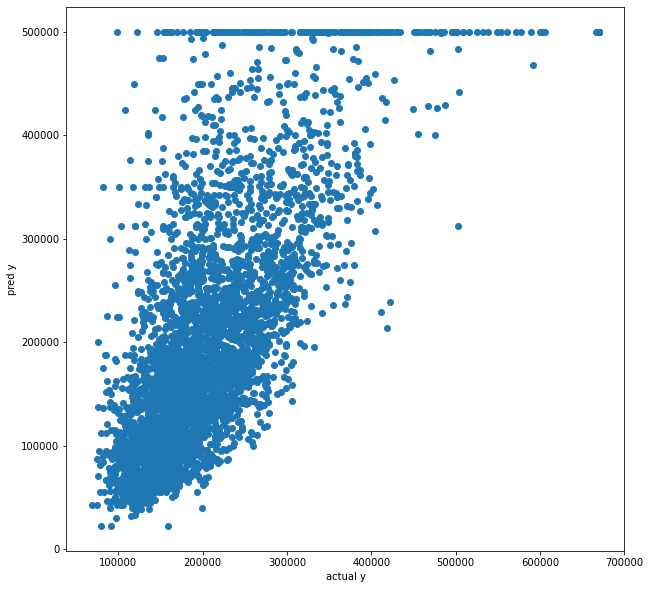

In [82]:
# plot pred vs actual for test
plt.figure(figsize=(10,10))

plt.scatter(ypred,ytest)
plt.xlabel('actual y')
plt.ylabel('pred y')

In [83]:
ypred1=ln1.predict(Xtrain)
ypred1

array([187442.51362169, 180361.73901011, 185658.80704015, ...,
       280910.40162428, 145377.80619633, 238671.06558254])

Text(0, 0.5, 'actual y')

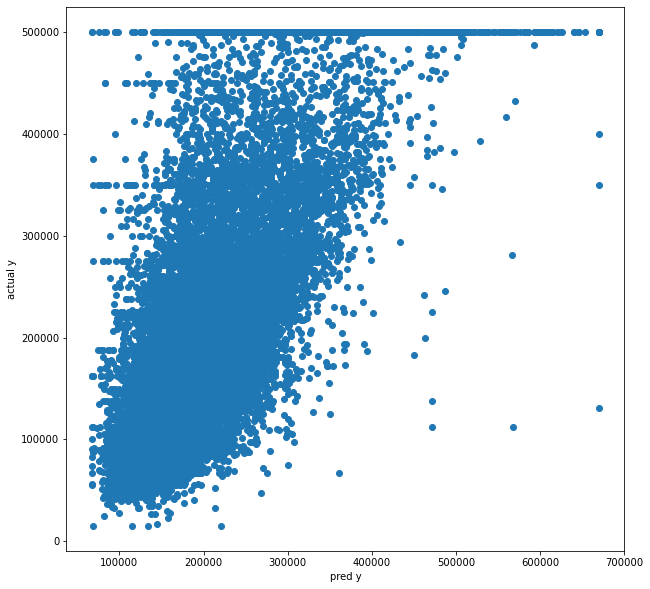

In [89]:
# plot pred vs actual for train data

plt.figure(figsize=(10,10))

plt.scatter(ypred1,ytrain)
plt.xlabel('pred y')
plt.ylabel('actual y')
